In [129]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [130]:
#periodogram
def perio(y_c):
    n=len(y_c)
    N=n//2
    pdgrm=((abs(np.fft.fft(y_c))**2)/(n))[1:int(N)]
    return(pdgrm)

In [131]:
#frequency to time domain 
def ftot(psd,dt,n_t,n_f):
    noise_f_real = np.random.normal(0, np.sqrt(n_t * psd / (2 * dt)), n_f)
    noise_f_imag = np.random.normal(0, np.sqrt(n_t * psd / (2 * dt)), n_f)
    noise_f = noise_f_real + 1j * noise_f_imag
    # Transform noise to the time domain
    noise_t = np.fft.irfft(noise_f)
    return(noise_t)

In [132]:
#first set (Frequency domain)
T = 24 * 60 * 60  # Total time in seconds (1 day)
dt = 1  # Time step in seconds
t = np.arange(0, T, dt)
n_time = len(t)
f = np.fft.rfftfreq(n_time, dt)
f[0] = f[1]
n_freq = len(f)
L=2.5e9
c=299792458

##noise
fref=c/(2*np.pi*L) #in Hz
npos=3.6e-41 #optical path-length fluctuation noise level
nacc=1.44e-48 #acceleration noise level
w_sq=(abs(1-np.exp(-2*np.pi*1j*f/fref)))**2 #|w|^2

ss=npos
sa=(nacc)*(1+((4e-4)/f)**2)/(2*np.pi*f)**4

n1=(4*ss+8*sa*(1+(np.cos(f/fref))**2))*w_sq
n2=-np.cos(f/fref)*(2*ss+8*sa)*w_sq

na=n1-n2 #noise in A or E channel
nt=n1+2*n2 #noise in T channel

##signal
fac=(2*np.pi*f*L/c)**2
r=(3/10)*fac/(1+0.6*fac) #Response function
b=1e-26
g=2/3
omega=b*(f/fref)**g #power law model
h0=2.27e-18
sa=(3*h0/(4*np.pi**2))*omega*r/f**3

In [133]:
#time domain
sig_t=ftot(sa,dt,n_time,n_freq)
noi_A=ftot(na,dt,n_time,n_freq)
T_ser=ftot(nt,dt,n_time,n_freq)
A_ser=noi_A+sig_t

#periodogram
A=perio(A_ser)
E=A
T=perio(T_ser)
f=f[1:-1]
sa=sa[1:-1]
na=na[1:-1]
nt=nt[1:-1]

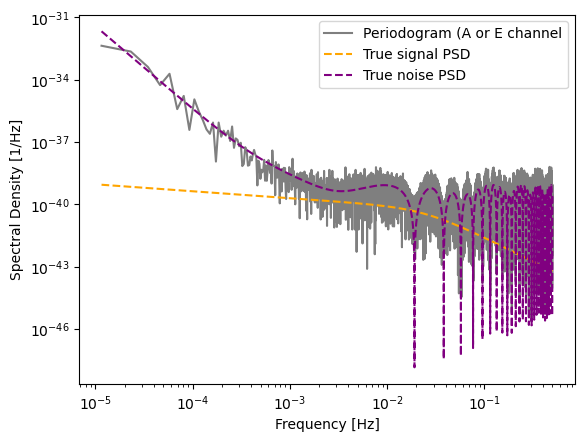

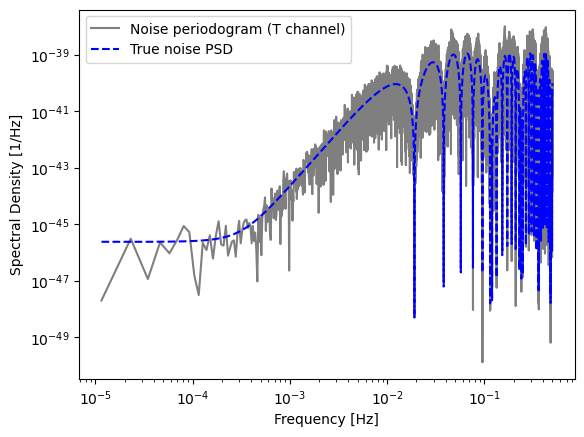

In [134]:
plt.plot(f, A, linestyle='-', color='black', alpha=0.5, label='Periodogram (A or E channel')
plt.plot(f, sa, linestyle='--', color='orange', label='True signal PSD')
plt.plot(f, na, linestyle='--', color='purple', label='True noise PSD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Spectral Density [1/Hz]')
plt.legend()
plt.show()

plt.plot(f, T, linestyle='-', color='black', alpha=0.5, label='Noise periodogram (T channel)')
plt.plot(f, nt, linestyle='--', color='blue', label='True noise PSD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Spectral Density [1/Hz]')
plt.legend()
plt.show()

In [135]:
#second set (Frequency domain)
T = 24 * 60 * 60  # Total time in seconds 1 day
dt = 1  # Time step in seconds
t = np.arange(0, T, dt)
n_time = len(t)
f = np.fft.rfftfreq(n_time, dt)
f[0] = f[1]
n_freq = len(f)

N_pos=3.6e-41
N_acc=1.44e-48
f_star=c/(2*np.pi*L)
f_div=f/f_star
W_sq=(abs(1-np.exp(-2*1j*f_div)))**2

#response functions: 
R_A=(9/20)*W_sq/(1+(3*f_div/4)**2)
R_T=(1/4032)* (f_div**6) * W_sq/(1+(5/16128)*f_div**8)

P_a=(N_acc)*(1+((4e-4)/f)**2)/(2*np.pi*f)**4 # single test mass acceleration noise
P_s=N_pos #opical path-length fluctuation noise

#cross spectral densities
N_x=(4*P_s+8*(1+(np.cos(f_div))**2)*P_a)*W_sq
N_xy=-(2*P_s+8*P_a)*np.cos(f_div)*W_sq

#noise model:
N_A=N_x-N_xy
N_T=N_x+2*N_xy

#noise spectral desities:
S_A=N_A/R_A
S_T=N_T/R_T

#noise energy spectral densities:
Omega_A=S_A*4*(f**3)*(np.pi**2)/(3*h0**2)
Omega_T=S_T*4*(f**3)*(np.pi**2)/(3*h0**2)

##signal
fac=2*np.pi*f*L/c
r=(3/10)*(fac**2)/(1+0.6*fac**2)
b=1e-10
g=2/3
omega=b*(f/fref)**g

In [136]:
#time domain
sig_t=ftot(omega,dt,n_time,n_freq)
noi_A=ftot(Omega_A,dt,n_time,n_freq)
T_ser=ftot(Omega_T,dt,n_time,n_freq)
A_ser=noi_A+sig_t

#periodogram
A=perio(A_ser)
E=A
T=perio(T_ser)
f=f[1:-1]
omega=omega[1:-1]
Omega_A=Omega_A[1:-1]
Omega_T=Omega_T[1:-1]

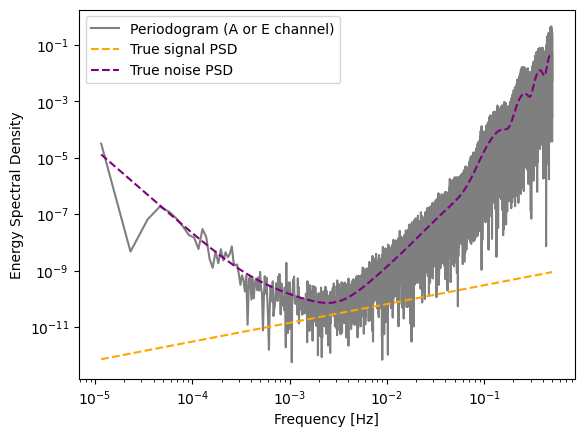

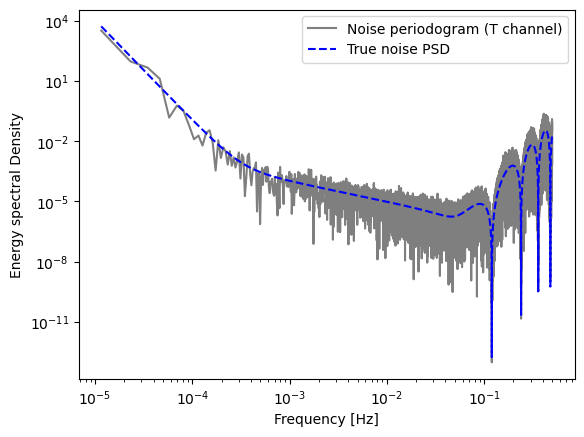

In [137]:
plt.plot(f, A, linestyle='-', color='black', alpha=0.5, label='Periodogram (A or E channel)')
plt.plot(f, omega, linestyle='--', color='orange', label='True signal PSD')
plt.plot(f, Omega_A, linestyle='--', color='purple', label='True noise PSD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy Spectral Density')
plt.legend()
plt.show()

plt.plot(f, T, linestyle='-', color='black', alpha=0.5, label='Noise periodogram (T channel)')
plt.plot(f, Omega_T, linestyle='--', color='blue', label='True noise PSD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy spectral Density')
plt.legend()
plt.show()